In [19]:
import pandas as pd
from matplotlib import cm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

file = pd.read_csv('insurance.csv')

print(file.info())
print(file.shape)

file.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
file.duplicated().any()
file =file.drop_duplicates()

In [21]:
file =file.drop_duplicates().reset_index()
file.shape

(1337, 8)

In [22]:
file['user_ID'] = pd.DataFrame(file.index).astype(int)
file = file[['user_ID', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
file

# file_feat_transp_count = pd.DataFrame(file_feat_transp[file_feat_transp[col]].sum())

,user_ID,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1332,50,male,30.970,3,no,northwest,10600.54830
1333,1333,18,female,31.920,0,no,northeast,2205.98080
1334,1334,18,female,36.850,0,no,southeast,1629.83350
1335,1335,21,female,25.800,0,no,southwest,2007.94500


In [23]:
# pd.get_dummies(file[['sex', 'smoker', 'region']])
file_dummies = pd.get_dummies(file[['sex', 'smoker', 'region']])
file_dummies['user_ID'] = file['user_ID']
file_dummies

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,user_ID
0,1,0,0,1,0,0,0,1,0
1,0,1,1,0,0,0,1,0,1
2,0,1,1,0,0,0,1,0,2
3,0,1,1,0,0,1,0,0,3
4,0,1,1,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...
1332,0,1,1,0,0,1,0,0,1332
1333,1,0,1,0,1,0,0,0,1333
1334,1,0,1,0,0,0,1,0,1334
1335,1,0,1,0,0,0,0,1,1335


In [24]:
file

,user_ID,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1332,50,male,30.970,3,no,northwest,10600.54830
1333,1333,18,female,31.920,0,no,northeast,2205.98080
1334,1334,18,female,36.850,0,no,southeast,1629.83350
1335,1335,21,female,25.800,0,no,southwest,2007.94500


In [26]:
file = pd.merge(file, file_dummies, on='user_ID')
file = file[['user_ID', 'age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'charges']]
file = file.sort_values(by='user_ID')
file = file[['age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'charges']]
file

,age,sex_female,sex_male,bmi,children,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,0,27.900,0,1,0,0,0,1,16884.92400
1,18,0,1,33.770,1,0,0,0,1,0,1725.55230
2,28,0,1,33.000,3,0,0,0,1,0,4449.46200
3,33,0,1,22.705,0,0,0,1,0,0,21984.47061
4,32,0,1,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...
1332,50,0,1,30.970,3,0,0,1,0,0,10600.54830
1333,18,1,0,31.920,0,0,1,0,0,0,2205.98080
1334,18,1,0,36.850,0,0,0,0,1,0,1629.83350
1335,21,1,0,25.800,0,0,0,0,0,1,2007.94500


In [46]:
def plot_boxes(x_df,y_df):
    boxes = len(y_df.unique())
    sns.set(rc={'figure.figsize':(20, boxes/1.5)}) 
    sns.boxplot(y=y_df, x=x_df, orient="h", fliersize=10);

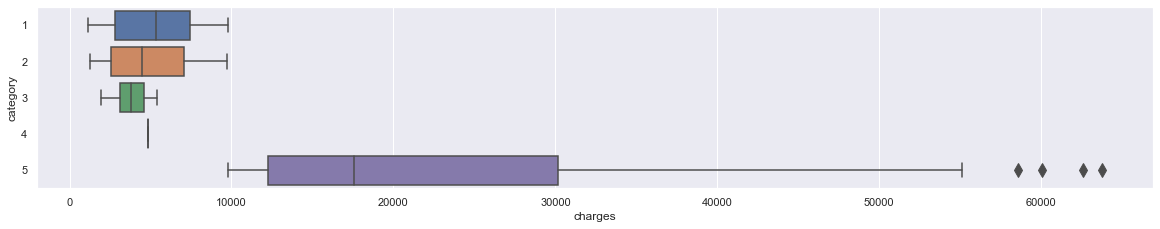

In [47]:
plot_boxes(file["charges"], file["category"])

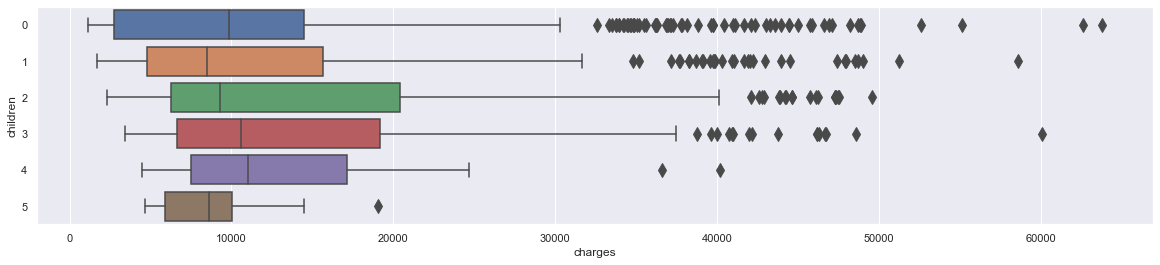

In [48]:
plot_boxes(file["charges"], file["children"])

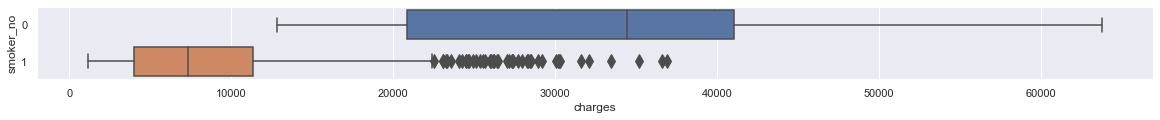

In [49]:
plot_boxes(file["charges"], file["smoker_no"])

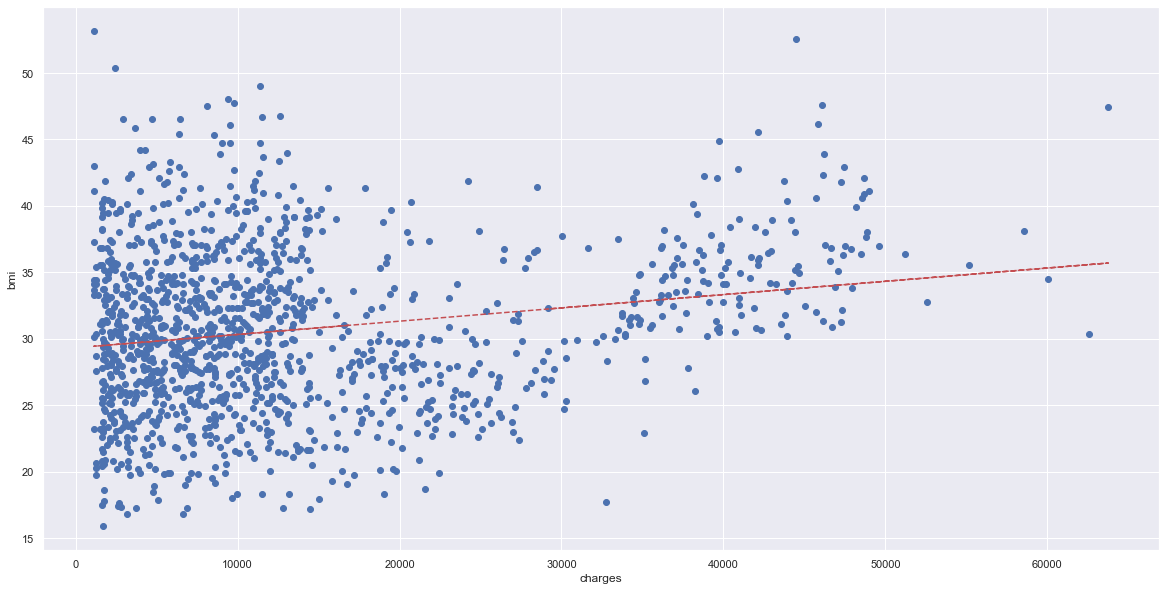

In [50]:
sns.set(rc={'figure.figsize':(20,10)}) 
y = file["bmi"]
x = file["charges"]
plt.scatter(x, y)
plt.ylabel("bmi")
plt.xlabel("charges")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--");

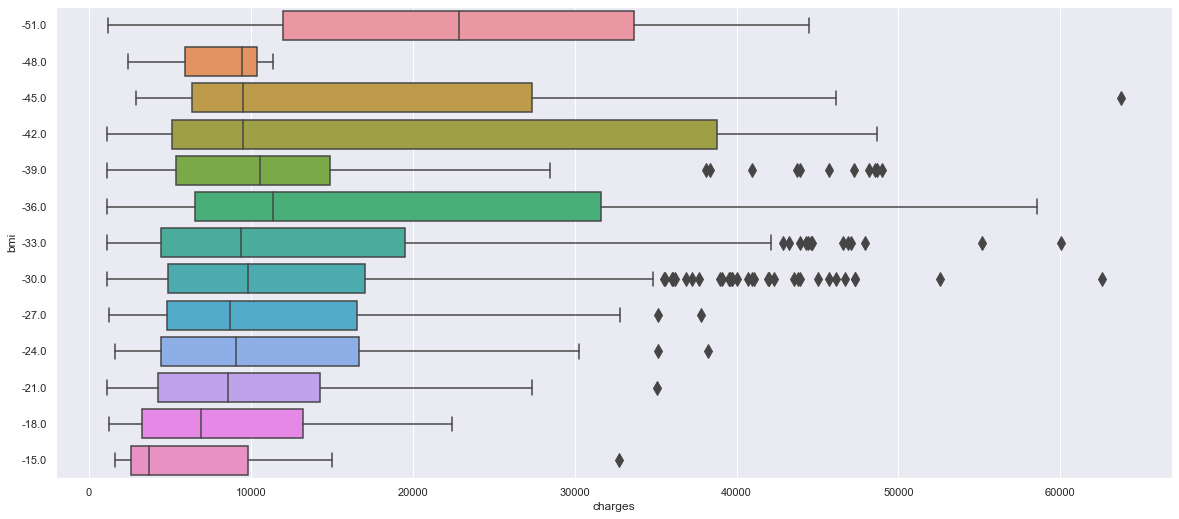

In [51]:
plot_boxes(file["charges"], -(file["bmi"]//3)*3)

In [52]:
file.head()

,age,sex_female,sex_male,bmi,children,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,category
1027,19,1,0,27.900,0,0,0,0,0,1,16884.92400,5
0,18,0,1,33.770,1,1,0,0,1,0,1725.55230,1
123,28,0,1,33.000,3,1,0,0,1,0,4449.46200,1
935,33,0,1,22.705,0,1,0,1,0,0,21984.47061,5
245,32,0,1,28.880,0,1,0,1,0,0,3866.85520,1


In [28]:
x = file.drop(["charges", "sex_female", "region_southwest"], axis=1)
y = file["charges"]

In [74]:
def model_summary(y_test,y_pred,title="Title"): 
    max = 55000
    sns.set(rc={'figure.figsize':(13,10)})
    plt.xlim(0,70000)
    plt.ylim(0,max)
    plt.scatter(y_test,y_pred)
    plt.yticks(rotation="90")
    plt.xlabel("test values")
    plt.ylabel("prediceted values")
    plt.plot([0,max],[0,max],'r--')
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    plt.title(str(title).upper(), font={'size':16})
    t1, t2, t3, t4 = "Mean:", "RMSE:", "MAE:", "R^2:"
    s1, s2, s3, s4 = format(y_pred.mean(),'.3f'), format(rmse,'.3f'), format(mae,'.3f'), format(r2,'.3f')
    plt.annotate(f"{t1} {s1:>10} \n{t2} {s2:>10} \n{t3} {s3:>11} \n{t4} {s4:>11}", [2500,max*.87], 
                    font={'size':13, 'family':'courier new', 'weight':'bold'}, 
                    bbox={'facecolor': 'white', 'edgecolor' : 'black', 'alpha': 0.5, 'pad': 10})

In [40]:
def feature_importance_barplot(x, feature_importance, type_of_ML):
    labels = list(x.columns)
    loc = range(0,len(labels),1)
    importance_prc = feature_importance*100
    sns.set(rc={'figure.figsize':(10,7)}) 
    ax = plt.bar([x for x in loc], importance_prc, color=cm.Blues_r(1-((66+importance_prc)/100)))
    plt.xticks(ticks=list(loc),labels=labels,rotation="45")
    plt.bar_label(ax, labels=importance_prc.round(2), padding=5)
    plt.ylabel("importance [%]")
    plt.yticks(rotation="90")
    plt.title((str(type_of_ML)+" - feature importance").upper())
    plt.show();

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=24)
rf = RandomForestRegressor().fit(x_train, y_train)

In [30]:
rf.score(x_test, y_test)

0.8561294767102792

In [33]:
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, MAE: {mae}, R^2: {r2}")

MSE: 22989250.8673613, MAE: 2706.2887104057386, R^2: 0.8561294767102792


In [65]:
param_grid = {"max_depth": list(range(2,11,1)),
              "max_features": list(range(6,11,2)),
              "ccp_alpha" : [0, 0.05, 0.1, 0.15],
              "n_estimators" : [100, 200, 500, 1000]
              }
grid_search = RandomizedSearchCV(rf, param_grid, random_state=42, n_jobs=-1)
grid_search.fit(x_train, y_train)
grid_search.best_estimator_;

In [66]:
rf_better = grid_search.best_estimator_
rf_better.fit(x_train, y_train)
rf_better.score(x_test,y_test)

0.8748894381191162

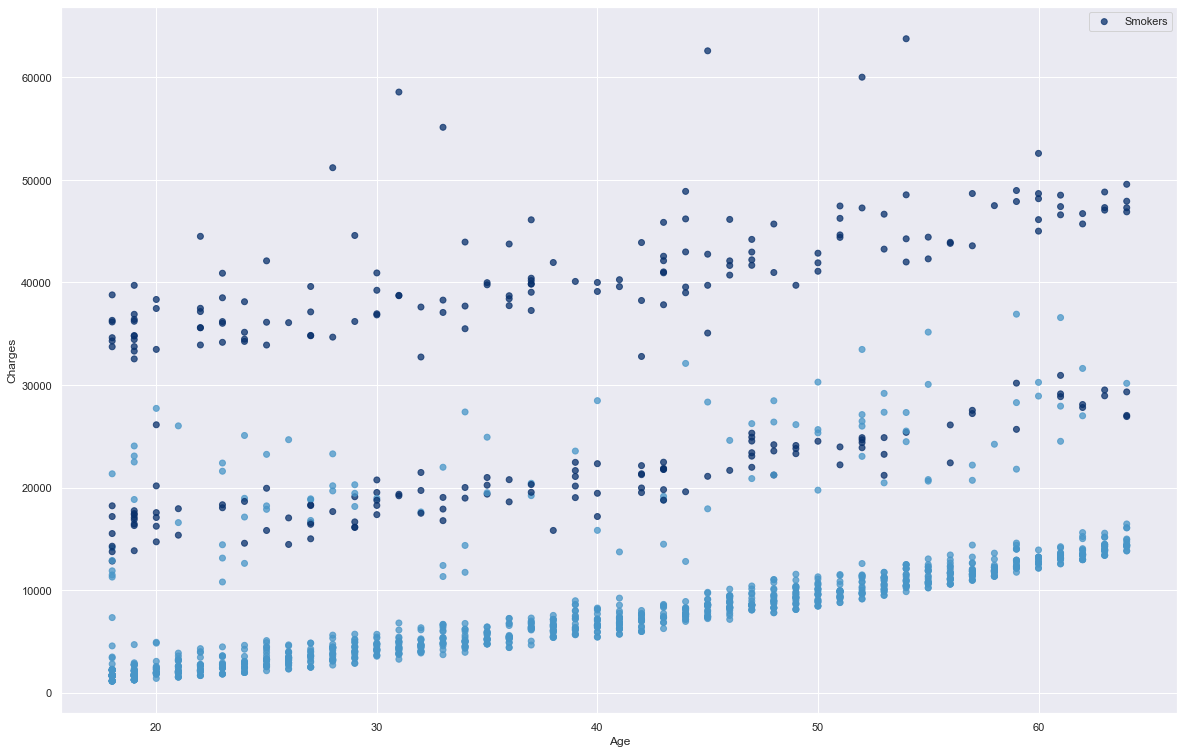

In [137]:
plt.figure(figsize=(20,13))
sc = plt.scatter(file["age"], file["charges"], color=cm.Blues_r(100-file["smoker_yes"]*100),alpha=.75)
plt.legend(["Smokers"])
plt.xlabel("Age")
plt.ylabel("Charges");

In [51]:
rf_y_pred = rf_better.predict(x_test)

NameError: name 'rf_better' is not defined

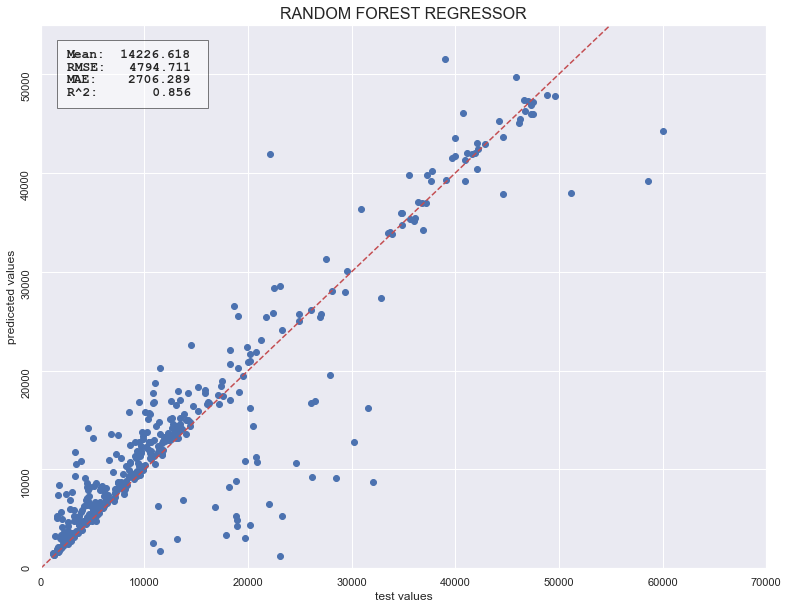

In [75]:
model_summary(y_test,y_pred, "Random Forest Regressor")

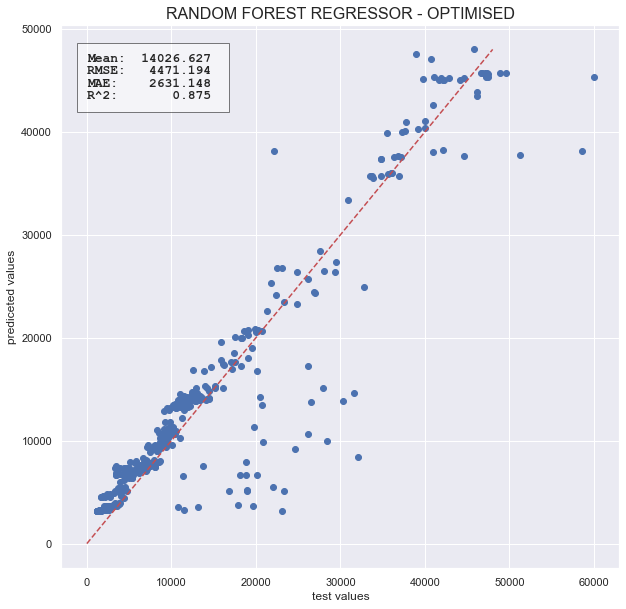

In [81]:
model_summary(y_test,rf_y_pred, "Random Forest Regressor - optimised")

In [43]:
rf_importance = rf.feature_importances_
for i,v in enumerate(rf_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.13991
Feature: 1, Score: 0.00623
Feature: 2, Score: 0.20426
Feature: 3, Score: 0.02174
Feature: 4, Score: 0.61057
Feature: 5, Score: 0.00604
Feature: 6, Score: 0.00643
Feature: 7, Score: 0.00481


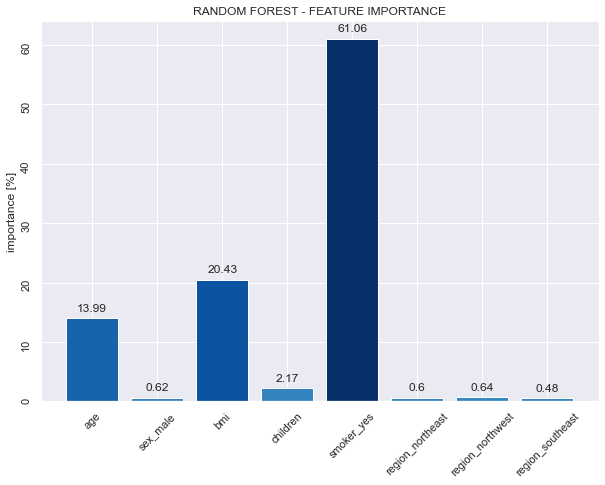

In [44]:
feature_importance_barplot(x, rf_importance, "random forest")

In [84]:
def outlier_iqr(df, columns):
    lower_limit = {}
    upper_limit = {}
    for col in columns:
        q1 = np.quantile(df[col], q=.25)
        q3 = np.quantile(df[col], q=.75)
        iqr = q3 - q1
        lower_limit[col] = q1 - 1.5 * iqr
        upper_limit[col] = q3 + 1.5 * iqr
    for col in columns:
        df = df.loc[(df[col] >= lower_limit[col]) & (df[col] <= upper_limit[col])]
    return df

In [85]:
col = ['age', 'bmi', 'charges']
file_out = outlier_iqr(file, col)
xo = file_out.drop(["charges","category", "sex_female", "region_southwest"], axis=1)
yo = file_out["charges"]
xo_train, xo_test, yo_train, yo_test = train_test_split(xo,yo,test_size=.3, random_state=24)
rf_out = RandomForestRegressor().fit(xo_train, yo_train)
rf_yo_pred = rf_out.predict(xo_test)
rf_out.score(xo_test, yo_test)

0.5640633845228985

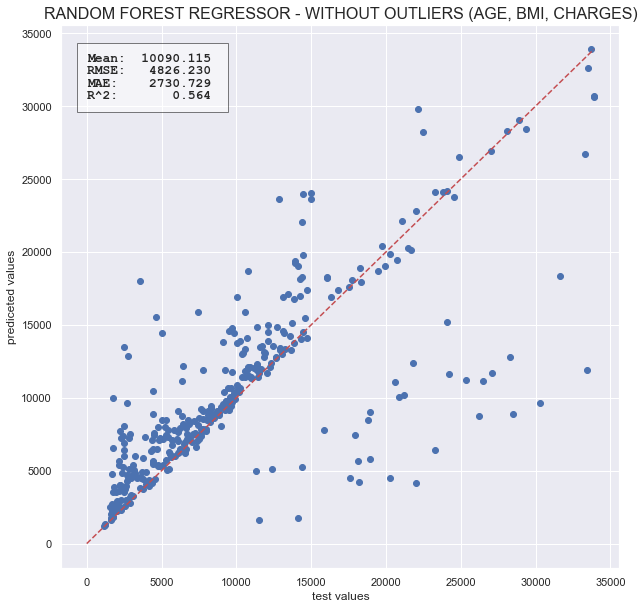

In [86]:
model_summary(yo_test,rf_yo_pred, "Random Forest Regressor - without outliers (age, bmi, charges)")

In [87]:
col2 = ['age', 'bmi']
file_out2 = outlier_iqr(file, col2)
xoc = file_out2.drop(["charges","category", "sex_female", "region_southwest"], axis=1)
yoc = file_out2["charges"]
xoc_train, xoc_test, yoc_train, yoc_test = train_test_split(xoc,yoc,test_size=.3, random_state=24)
rf_out_charges = RandomForestRegressor().fit(xo_train, yo_train)
rf_yoc_pred = rf_out_charges.predict(xoc_test)
rf_out_charges.score(xoc_test, yoc_test)

0.8385485532234189

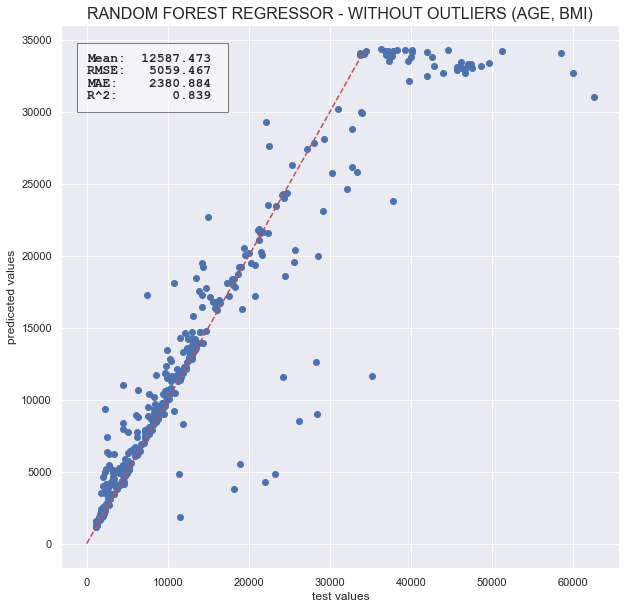

In [88]:
model_summary(yoc_test,rf_yoc_pred, "Random Forest Regressor - without outliers (age, bmi)")

In [47]:
rf.score(x_train,y_train)

0.9738916120260785

In [48]:
rf.score(x_test, y_test)

0.8561294767102792